___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to **"Bike Demand Visualization Project"** which is the capstone project of Data Visualization Lessons . As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.  

The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

This will allow us to X-ray the data as part of the EDA process before setting up a machine learning model.



---
---

# #Determines



#### Features

- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

**"weather_code" category description:**
* 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
* 2 = scattered clouds / few clouds 
* 3 = Broken clouds 
* 4 = Cloudy 
* 7 = Rain/ light Rain shower/ Light rain 
* 10 = rain with thunderstorm 
* 26 = snowfall 
* 94 = Freezing Fog
---

Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc.  Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.  


# Tasks


### 1.Import libraries

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
sns.set_style("darkgrid")
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

### 2.Read dataset

In [2]:
pwd

'C:\\Users\\win7\\JUPYTER\\DV_capstone_student'

In [3]:
df = pd.read_csv("store_sharing.csv")
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


### 3.Check missing values and if there are any dublicate rows or not.

In [4]:
df.nunique(axis=1, dropna=True).shape[0]

17414

In [5]:
df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

### 4.Plot the distribution of various discrete features on (Season, haliday, weekend and weathercode)

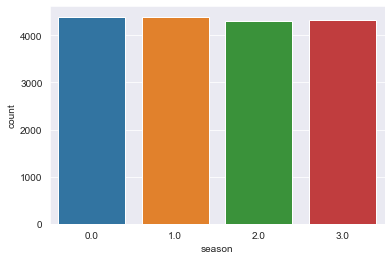

In [6]:
# season
sns.countplot(x=df.season);


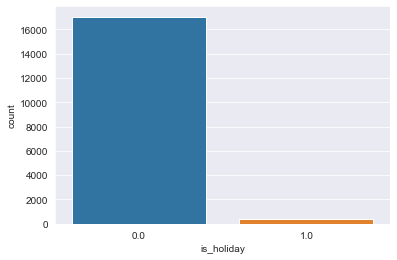

In [7]:
# is_holiday
sns.countplot(x=df.is_holiday);

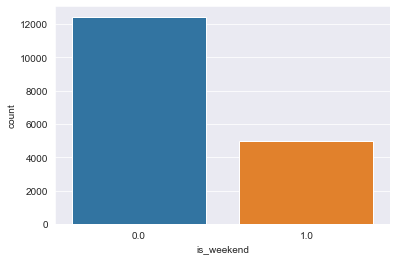

In [8]:
# is_weekend
sns.countplot(x=df.is_weekend);

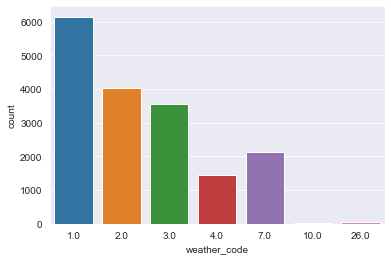

In [9]:
# weather_code
sns.countplot(x=df.weather_code);

### 5.Look at the data type of each variable, transform `timestamp` in type, and set it as index.

In [10]:
df.timestamp = pd.to_datetime(df.timestamp)
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


- Tam 2 yillik bir timestamp var. `year, month, day_of_month, day_of_week, hour` bilgilerini alarak feature engineering yapalim

### 6.Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)

you can use strftime('%Y-%m') for year_mount

In [11]:
df["year_month"] = df.timestamp.apply(lambda x : x.strftime("%Y-%m"))
df["year_month"].head()

0    2015-01
1    2015-01
2    2015-01
3    2015-01
4    2015-01
Name: year_month, dtype: object

In [12]:
df["year"] = df.timestamp.apply(lambda x : x.strftime("%Y"))
df["year"].head()

0    2015
1    2015
2    2015
3    2015
4    2015
Name: year, dtype: object

In [13]:
df["month"] = df.timestamp.apply(lambda x : x.strftime("%m"))
df["month"].head()

0    01
1    01
2    01
3    01
4    01
Name: month, dtype: object

In [14]:
df["day_of_month"] = df.timestamp.apply(lambda x : x.strftime("%d"))
df["day_of_month"].head()

0    04
1    04
2    04
3    04
4    04
Name: day_of_month, dtype: object

In [25]:
df["day_of_week"] = df.timestamp.apply(lambda x : datetime.weekday(x))

df["day_of_week"].head()

0    6
1    6
2    6
3    6
4    6
Name: day_of_week, dtype: int64

In [16]:
df["hour"] = df.timestamp.apply(lambda x : x.strftime("%H"))
df["hour"].head()

0    00
1    01
2    02
3    03
4    04
Name: hour, dtype: object

In [26]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year_month,year,month,day_of_month,day_of_week,hour
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01,2015,01,04,6,00
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01,2015,01,04,6,01
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01,2015,01,04,6,02
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01,2015,01,04,6,03
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01,2015,01,04,6,04


### 7.Visualize the correlation with a heatmap

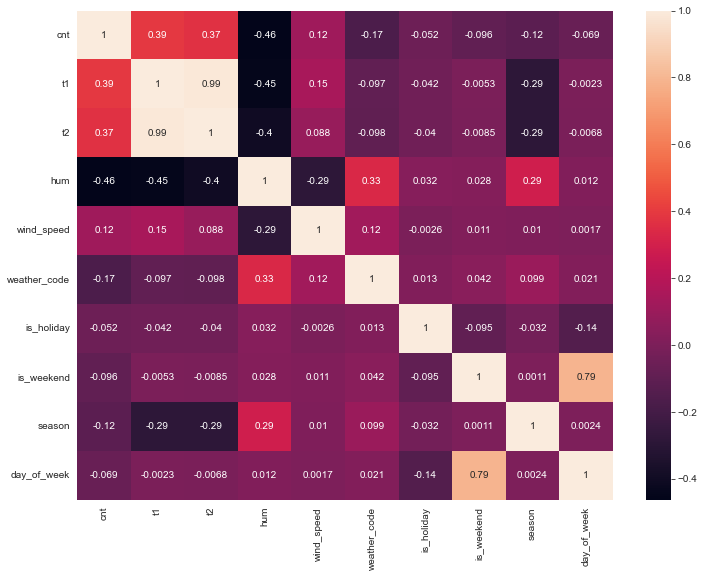

In [28]:
# for all variables 
plt.figure(figsize=(12,9))
sns.heatmap(data=df.corr(),annot=True)
plt.show()

In [29]:
df.corr()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,day_of_week
cnt,1.000000,0.388798,0.369035,-0.462901,0.116295,-0.166633,-0.051698,-0.096499,-0.116180,-0.068688
t1,0.388798,1.000000,0.988344,-0.447781,0.145471,-0.097114,-0.042233,-0.005342,-0.285851,-0.002317
t2,0.369035,0.988344,1.000000,-0.403495,0.088409,-0.098385,-0.040051,-0.008510,-0.285900,-0.006824
hum,-0.462901,-0.447781,-0.403495,1.000000,-0.287789,0.334750,0.032068,0.028098,0.290381,0.011556
wind_speed,0.116295,0.145471,0.088409,-0.287789,1.000000,0.124803,-0.002606,0.011479,0.010305,0.001708
weather_code,-0.166633,-0.097114,-0.098385,0.334750,0.124803,1.000000,0.012939,0.042362,0.098976,0.020619
is_holiday,-0.051698,-0.042233,-0.040051,0.032068,-0.002606,0.012939,1.000000,-0.094898,-0.032488,-0.144628
is_weekend,-0.096499,-0.005342,-0.008510,0.028098,0.011479,0.042362,-0.094898,1.000000,0.001067,0.791975
season,-0.116180,-0.285851,-0.285900,0.290381,0.010305,0.098976,-0.032488,0.001067,1.000000,0.002356
day_of_week,-0.068688,-0.002317,-0.006824,0.011556,0.001708,0.020619,-0.144628,0.791975,0.002356,1.000000


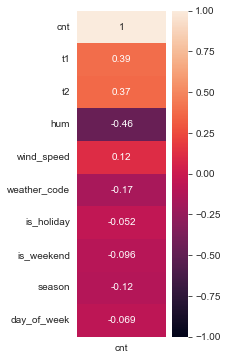

In [30]:
# for the target variable
plt.figure(figsize=(2,6))
sns.heatmap(df.corr().loc[:,["cnt"]],annot=True,vmin=-1,vmax=+1);

### 8. Visualize the correlation of the target variable and the other features with barplot

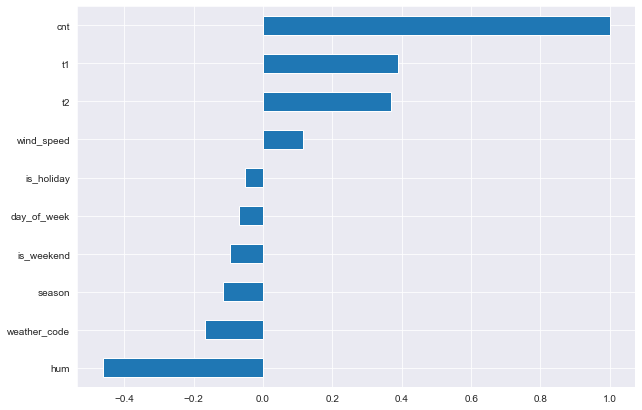

In [31]:
#with pandas
df.corr().loc[:,["cnt"]].sort_values(by="cnt").plot.barh(legend=False,figsize=(10,7));

### 9.Plot bike shares over time use lineplot

<AxesSubplot:xlabel='timestamp', ylabel='cnt'>

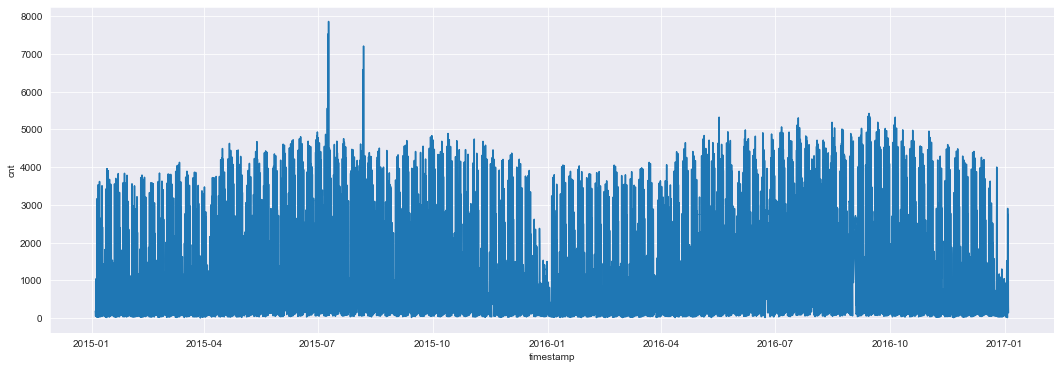

In [32]:
plt.figure(figsize=(18,6))
sns.lineplot(x="timestamp",y="cnt",data=df)

### 10.Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot)

In [33]:
df.timestamp = df.year_month

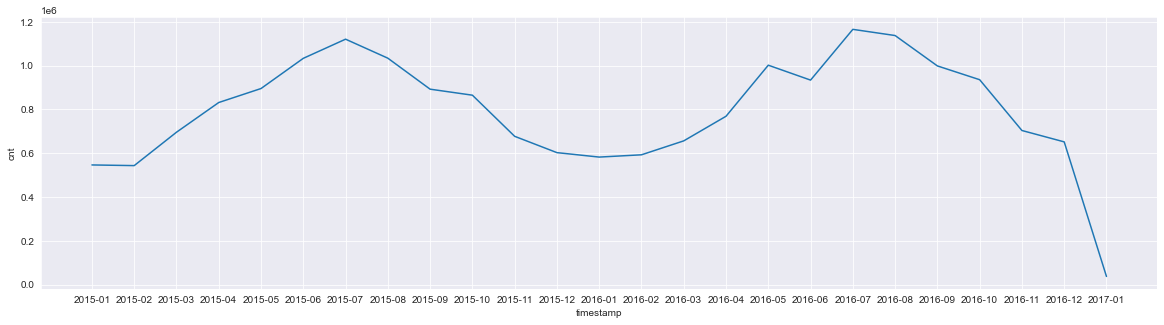

In [34]:
nev_cnt = df.groupby("timestamp").sum()[["cnt"]]
nev_cnt= nev_cnt.reset_index()
plt.figure(figsize=(20,5))
sns.lineplot(x=nev_cnt.timestamp,y=nev_cnt.cnt);

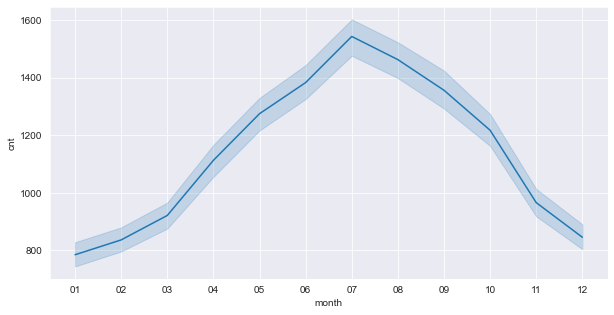

In [35]:
# with lineplot
plt.figure(figsize=(10,5))
sns.lineplot(x=df.month,y=df.cnt);

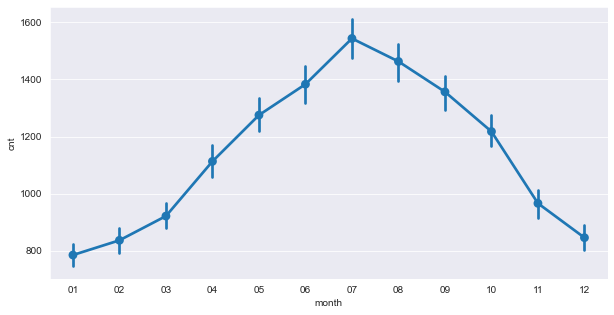

In [36]:
# with pointplot
plt.figure(figsize=(10,5))
sns.pointplot(x=df.month,y=df.cnt);

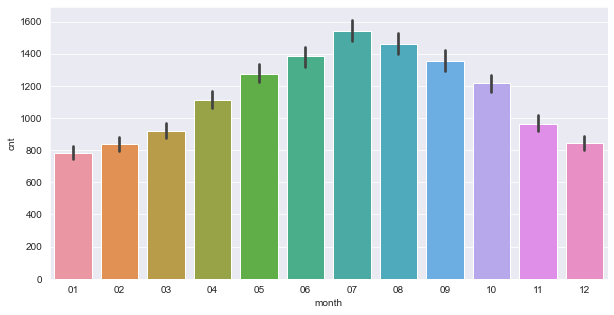

In [37]:
# with barplot
plt.figure(figsize=(10,5))
sns.barplot(x=df.month,y=df.cnt);

### 11.Plot bike shares by hours on (holidays, weekend, season)

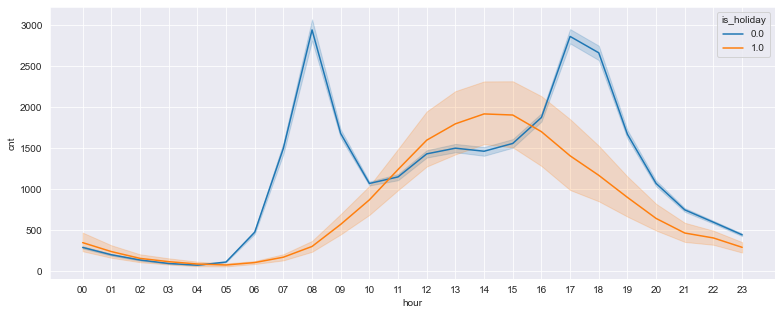

In [38]:
# with lineplot (*whether it is a holiday or not*)
plt.figure(figsize=(13,5))
sns.lineplot(x=df.hour,y=df.cnt,hue=df.is_holiday);

<AxesSubplot:xlabel='hour', ylabel='cnt'>

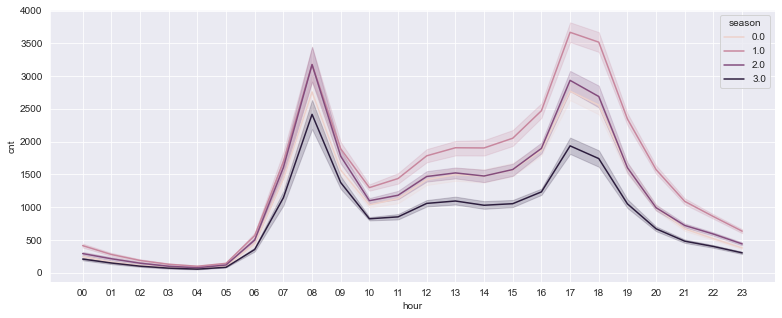

In [39]:
# with lineplot (*You may want to see seasonal breakdowns*)
plt.figure(figsize=(13,5))
sns.lineplot(x=df.hour,y=df.cnt,hue=df.season)

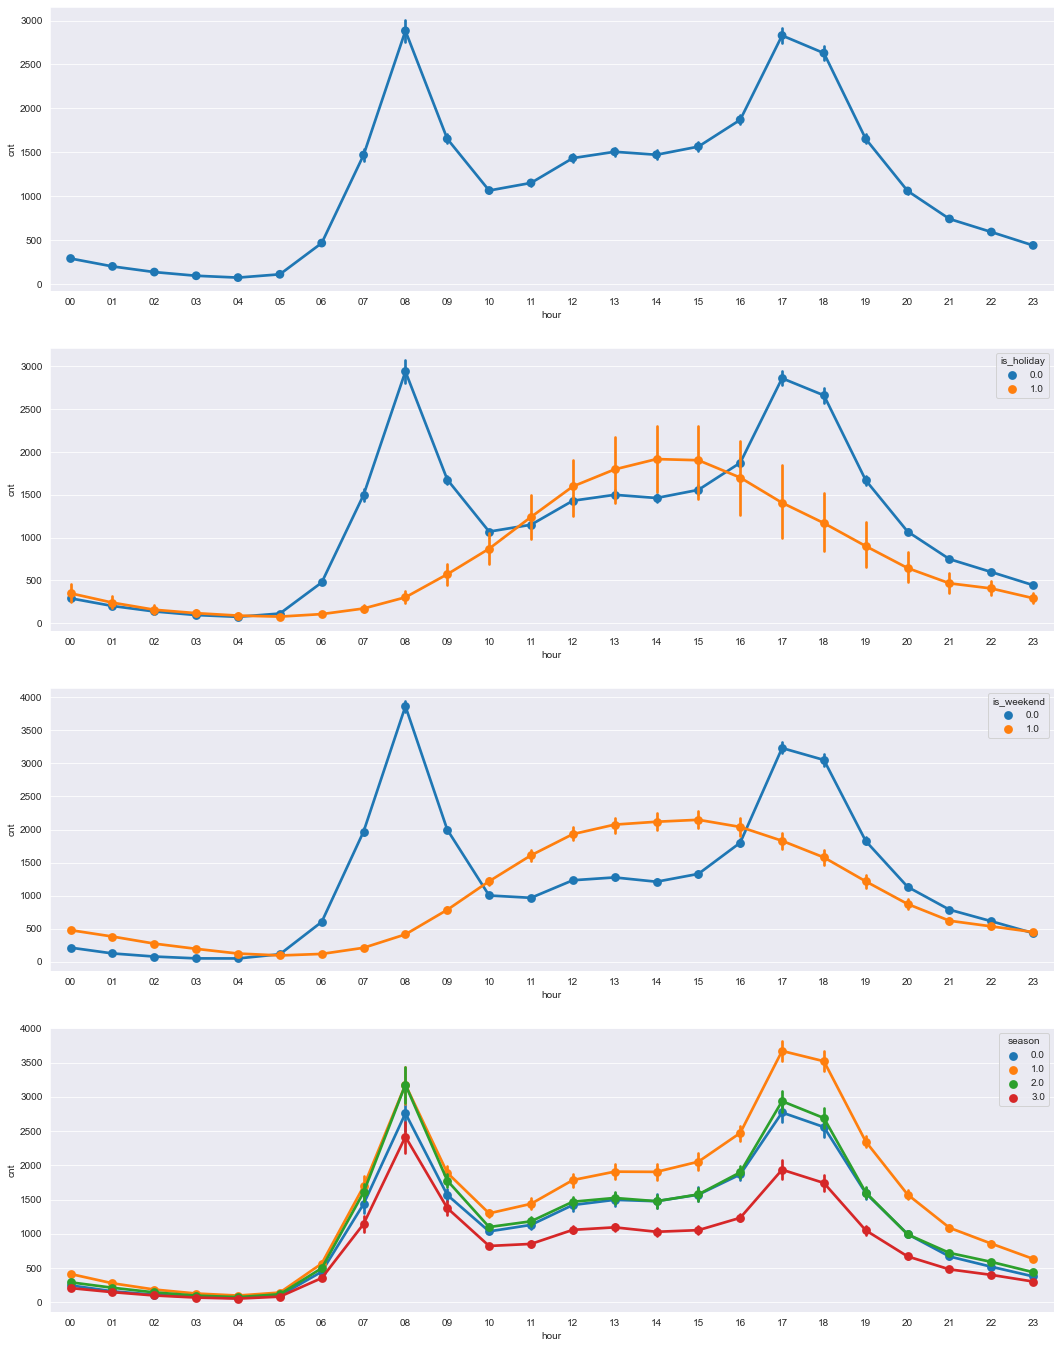

In [40]:
# with pointplot
plt.figure(figsize=(18,24))
plt.subplot(4,1,1)
sns.pointplot(x=df.hour,y=df.cnt)
plt.subplot(4,1,2)
sns.pointplot(x=df.hour,y=df.cnt,hue=df.is_holiday)
plt.subplot(4,1,3)
sns.pointplot(x=df.hour,y=df.cnt,hue=df.is_weekend)
plt.subplot(4,1,4)
sns.pointplot(x=df.hour,y=df.cnt,hue=df.season);

### 12.Plot bike shares by day of week
- You may want to see whether it is a holiday or not

In [41]:
dayshare = df.groupby("day_of_week").mean().reset_index()
dayshare

,day_of_week,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,0,1130.270734,12.324362,11.407895,73.143541,15.672049,2.748405,0.105263,0.0,1.492424
1,1,1230.105389,12.477445,11.598403,71.939521,15.927745,2.691417,0.009581,0.0,1.486228
2,2,1244.409000,12.645842,11.721776,71.791683,16.206910,2.701085,0.000000,0.0,1.478907
3,3,1258.810594,12.557584,11.584470,71.125602,16.098917,2.571027,0.000000,0.0,1.500803
4,4,1182.772653,12.429592,11.468980,72.351837,15.366327,2.586531,0.039184,0.0,1.498367
5,5,995.553753,12.567951,11.553753,72.682556,16.455172,2.860446,0.000000,1.0,1.496552
6,6,959.567265,12.276381,11.311710,73.235629,15.664105,2.898603,0.000000,1.0,1.491417


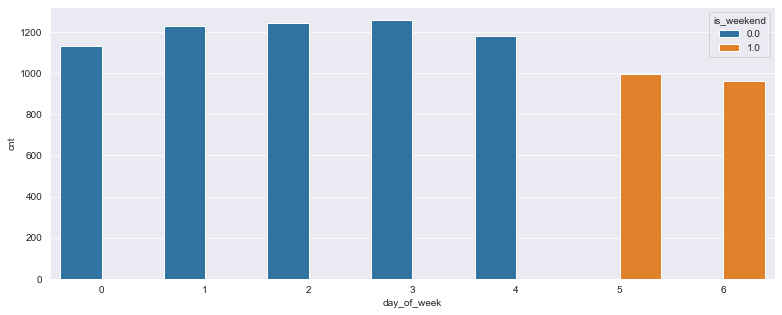

In [42]:
plt.figure(figsize=(13,5))
sns.barplot(x="day_of_week",y="cnt",data=dayshare,hue="is_weekend");

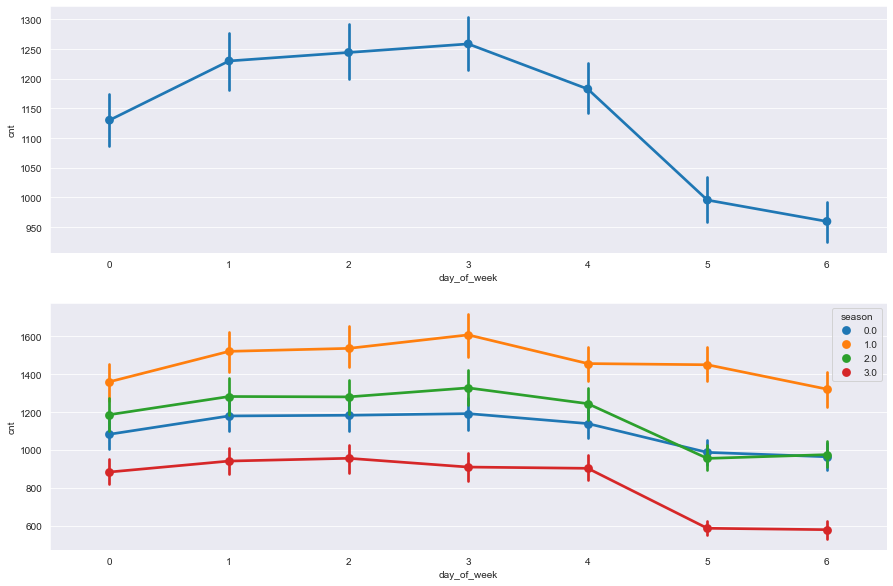

In [43]:
# with pointplot
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.pointplot(x=df.day_of_week,y=df.cnt)
plt.subplot(2,1,2)
sns.pointplot(x=df.day_of_week,y=df.cnt, hue=df.season);

### 13.Plot bike shares by day of month

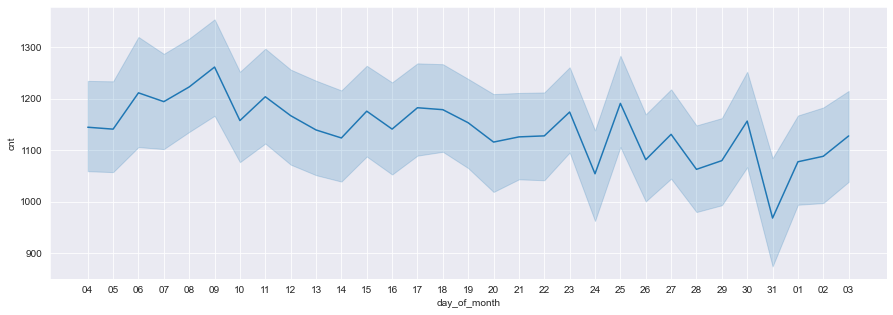

In [44]:
#with lineplot
plt.figure(figsize=(15,5))
sns.lineplot(x =df.day_of_month, y= df.cnt);


### 14.Plot bike shares by year
### Plot bike shares on holidays by seasons

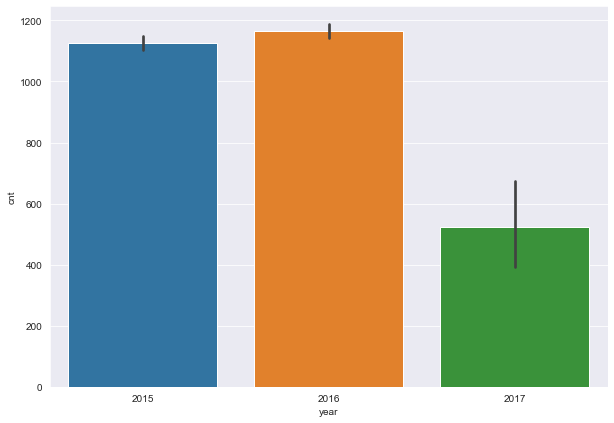

In [45]:
# with barplot
plt.figure(figsize=(10,7))
sns.barplot(x=df.year, y=df.cnt);

In [67]:
df1 = df[df["is_holiday"]==1.0]
df1.season.value_counts()

0.0    192
3.0    144
1.0     48
Name: season, dtype: int64

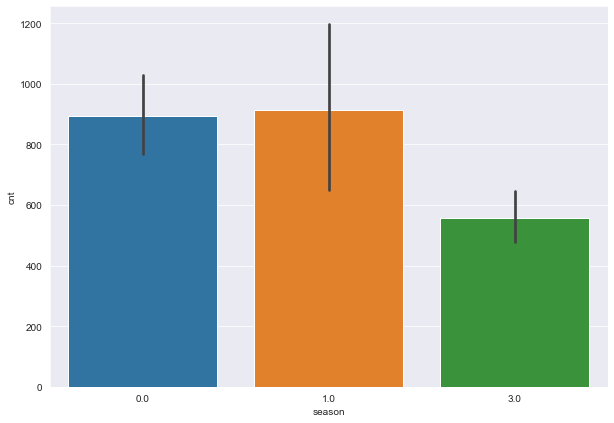

In [68]:
# with barplot
plt.figure(figsize=(10,7))
sns.barplot(x="season", y="cnt",data=df1);

### 15.Visualize the distribution of bike shares by weekday/weekend with piechart and barplot

In [48]:
df.is_weekend.value_counts()

0.0    12444
1.0     4970
Name: is_weekend, dtype: int64

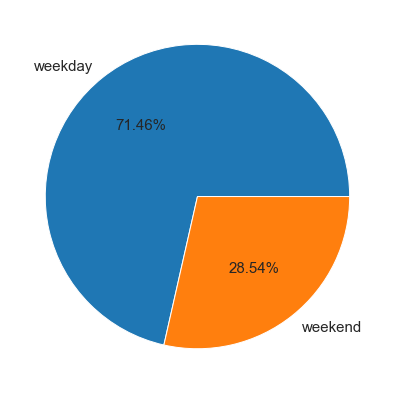

In [49]:
# pie chart
label= ["weekday","weekend"]
plt.figure(figsize=(10,7))
plt.pie(x=df.is_weekend.value_counts(),autopct = "%0.2f%%",textprops={"fontsize":15},labels=label);

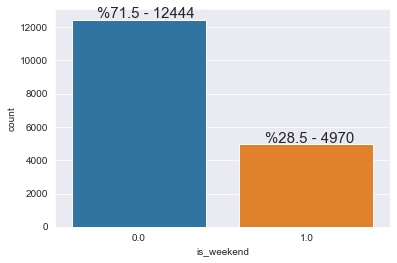

In [70]:
# with countplot

fig, ax = plt.subplots()
ax = sns.countplot(x=df.is_weekend)

for p in ax.patches:
    ax.annotate("%"+str(round(p.get_height()/len(df)*100, 1))+" - "+str(p.get_height()), (p.get_x()+0.15, p.get_height()+97), size=15)




    

In [ ]:
a = len(df[df.is_weekend == 0.0])
a

### 16.Plot the distribution of weather code by seasons

In [ ]:
sns.set_style("whitegrid")

In [ ]:
df.head()

In [ ]:
# with countplot
sns.countplot(x=df.weather_code);

In [ ]:
# with catplot
sns.catplot(x="weather_code",data=df,kind="count",col="season")

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___